In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv("df_final_01.csv")


In [2]:
df_filtered = df[df["heating_status"] == 1]

text_cols = [col for col in df_filtered.columns if col.startswith("TEXT")]


if "heating_status" in df_filtered.columns:
    text_cols.append("heating_status")


cluster_col = next((col for col in df_filtered.columns if col.startswith("clust")), None)

if cluster_col is None:
    raise ValueError("Aucune colonne de cluster trouvée.")


X = df_filtered[text_cols].drop(columns=["heating_status"]) 
y = df_filtered[cluster_col]  



In [3]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [8]:
def evaluate_models_split(X_train, X_test, y_train, y_test , models):
  
    
    results = {}
    
    for name, model in models.items():
        print(f"\n Évaluation de {name} avec train_test_split...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred) 

        results[name] = {"f1_score": f1, "accuracy": accuracy}
        
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Prédictions')
        plt.ylabel('Vraies classes')
        plt.title(f'Matrice de confusion - {name}')
        plt.show()
        
        print(f"{name} - Accuracy: {accuracy:.4f} - F1 Score: {f1:.4f}")
        print("###################################################################")
    
    return results


In [5]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

def evaluate_models_cv(X, y, models, cv=4):
    results = {}

    for name, model in models.items():
        print(f"\n Évaluation de {name} avec Cross Validation ({cv}-folds)...")

        scoring = ["accuracy", "f1_weighted"]
        scores = {}

        for metric in scoring:
            score = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), scoring=metric)
            scores[metric] = np.mean(score)  
        results[name] = scores

        print(f"{name} - Accuracy: {scores['accuracy']:.4f} - F1 Score: {scores['f1_weighted']:.4f}")
        print("###################################################################")

    return results


In [9]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Évaluation de Random Forest avec train_test_split...


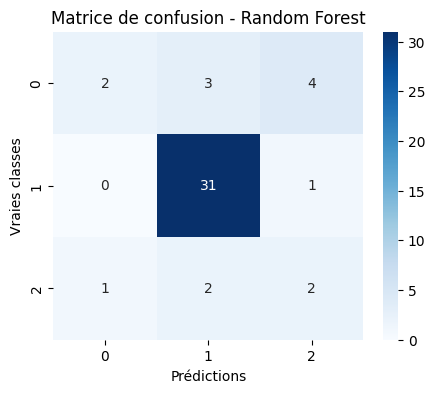

Random Forest - Accuracy: 0.7609 - F1 Score: 0.7357
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


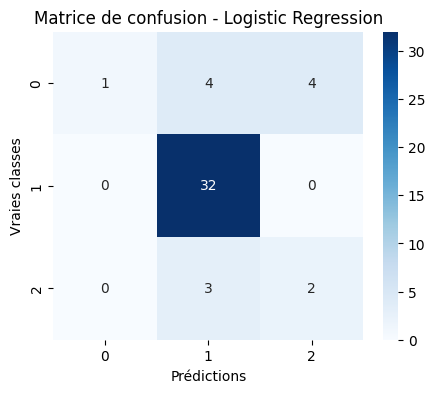

Logistic Regression - Accuracy: 0.7609 - F1 Score: 0.7057
###################################################################

 Évaluation de SVC avec train_test_split...


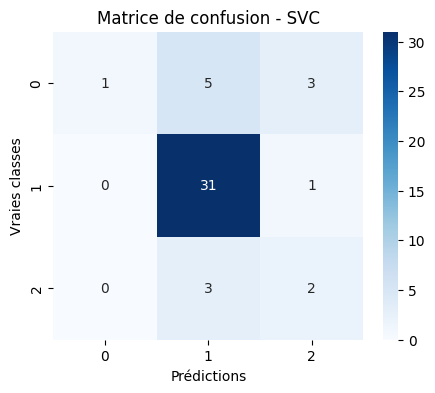

SVC - Accuracy: 0.7391 - F1 Score: 0.6861
###################################################################

 Évaluation de KNN avec train_test_split...


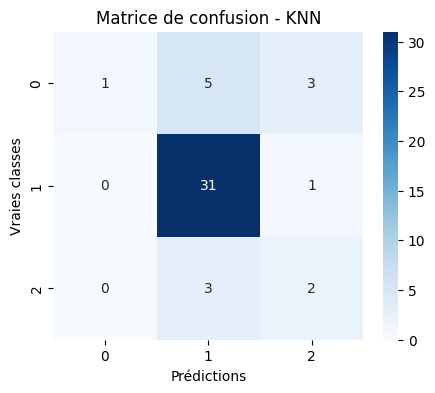

KNN - Accuracy: 0.7391 - F1 Score: 0.6861
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


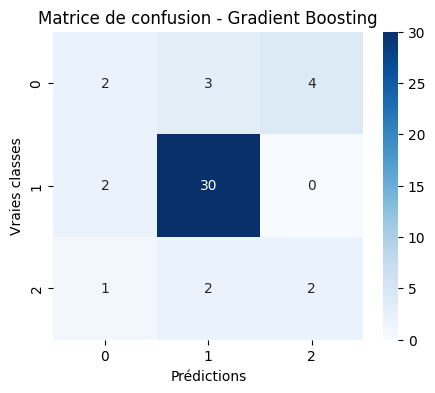

Gradient Boosting - Accuracy: 0.7391 - F1 Score: 0.7184
###################################################################


In [10]:
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)




In [148]:
results_cv = evaluate_models_cv(X, y, models, cv=4)


 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8283 - F1 Score: 0.8091
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8107 - F1 Score: 0.7953
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8592 - F1 Score: 0.8262
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8459 - F1 Score: 0.8165
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.8150 - F1 Score: 0.8027
###################################################################
